<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

In [1]:
import gc
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utilities import *
from itertools import combinations
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from surprise import accuracy, Dataset, KNNBaseline, Reader
from surprise.model_selection import cross_validate, train_test_split

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ratings = load_data()
ratings.drop('timestamp', axis=1, inplace=True)

# Section 3
## Q1

In [3]:
n = len(ratings.movieId.unique())
m = len(ratings.userId.unique())
sparcity = np.divide(ratings.shape[0], n*m)
display(sparcity)

0.016439141608663475

## Q2

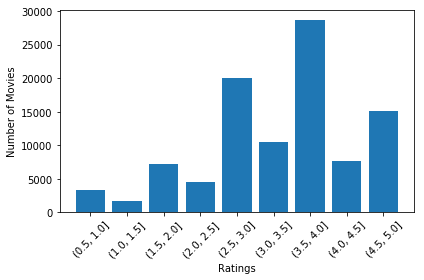

In [4]:
ratings['rating_bin'] = pd.cut(ratings['rating'], bins=np.arange(0.5, 5.5, 0.5))
bar_height = ratings.groupby(['rating_bin']).agg({'rating': 'count'})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height['rating'])
ax.set_xticks(np.arange(bar_height.shape[0]))
ax.set_xticklabels(bar_height.index,rotation=45)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Movies')

fig.tight_layout()
fig.savefig('report/figures/q2.png', dpi=300)

## Q3

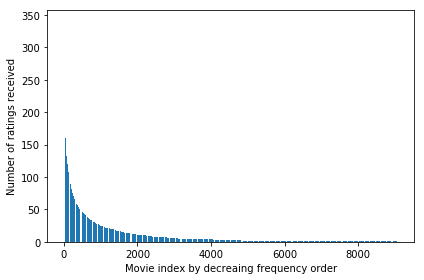

In [6]:
bar_height = ratings.groupby(['movieId']).agg({'rating': 'count'}).\
    rename(columns={'rating': 'rating_count'}).sort_values('rating_count', ascending=False)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height.rating_count)
ax.set_xlabel('Movie index by decreaing frequency order')
ax.set_ylabel('Number of ratings received')

fig.tight_layout()
fig.savefig('report/figures/q3.png', dpi=300)

## Q4

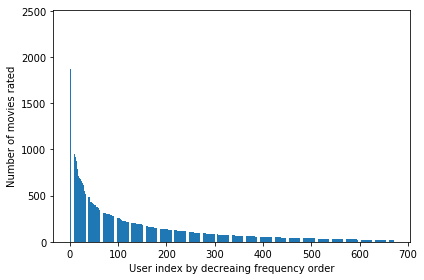

In [7]:
bar_height = ratings.groupby('userId').agg({'rating': 'count'}).\
    rename(columns={'rating': 'rating_count'}).sort_values('rating_count', ascending=False)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height.rating_count)
ax.set_xlabel('User index by decreaing frequency order')
ax.set_ylabel('Number of movies rated')

fig.tight_layout()
fig.savefig('report/figures/q4.png', dpi=300)

## Q6

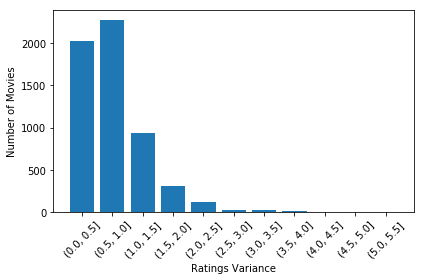

In [8]:
movie_var = ratings.groupby('movieId').agg({'rating': lambda x: np.var(x)}).rename(columns={'rating': 'rating_var'})
movie_var['rating_var_bin'] = pd.cut(movie_var.rating_var, bins=np.arange(0, movie_var.rating_var.max()+0.5, 0.5))
bar_height = movie_var.groupby('rating_var_bin').agg({'rating_var': 'count'}).rename(columns={'rating_var': 'count'})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height['count'])
ax.set_xticks(np.arange(bar_height.shape[0]))
ax.set_xticklabels(bar_height.index,rotation=45)
ax.set_xlabel('Ratings Variance')
ax.set_ylabel('Number of Movies')

fig.tight_layout()
fig.savefig('report/figures/q6.png', dpi=300)

# Section 4


## Q7 - Q9

$u_u = \frac{1}{n}\sum_{k \in I_u} r_{uk}$

Movies that have been both rated by user $u$ and user $v$. It could be an empty set.

## Q10

In [11]:
ratings.drop('rating_bin', axis=1, inplace=True)

In [12]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings, reader)
sim_options = {'name': 'pearson'}

mae_errors = []
rmse_error = []
ks = np.arange(2, 102, 2)

for k in ks:
    if k % 20 == 0:
        print(k)
    algo = KNNBaseline(k=k, sim_options=sim_options)
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    mae_errors.append(results['test_mae'].mean())
    rmse_error.append(results['test_rmse'].mean())

Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarit

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matr

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Estimating biases using als...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matr

Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Estimating biases using als...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similar

Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similar

Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarit

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson similarity matr

In [13]:
min_k = np.max([np.argmax(mae_errors - np.min(mae_errors) <= 5e-3), np.argmax(rmse_error - np.min(rmse_error) <= 5e-3)])
ks[min_k]

18

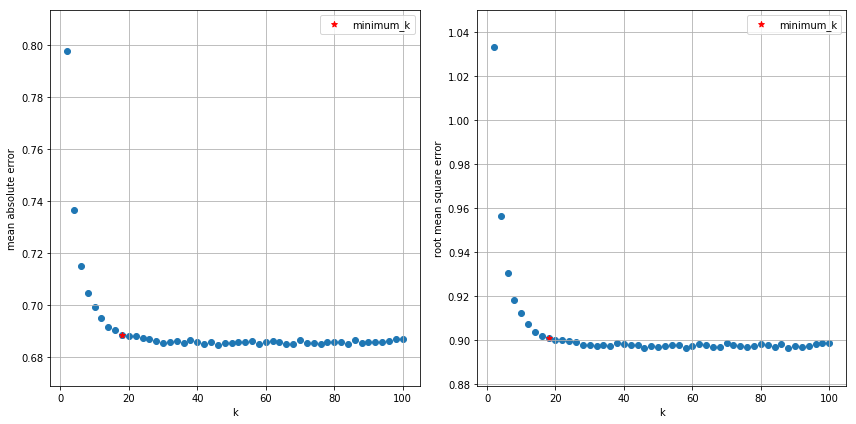

In [14]:
plot_mae_n_rmse(mae_errors, rmse_error, ks, min_k, 'q10.png')

## Q11

In [16]:
display(ks[min_k])
display(rmse_error[min_k])
display(mae_errors[min_k])

18

0.90080086749820887

0.68879501992355918

## Q12 - Q14

In [17]:
movie_rating_freq = ratings.groupby('movieId').agg({'userId': 'count'}).rename(columns={'userId': 'rating_count'})
movie_var = ratings.groupby('movieId').agg({'rating': lambda x: np.var(x)}).rename(columns={'rating': 'rating_var'})
popular_movies = movie_rating_freq[movie_rating_freq.rating_count > 2].index
unpplar_movies = movie_rating_freq[movie_rating_freq.rating_count < 3].index
highvar_movies = movie_rating_freq[np.logical_and(movie_rating_freq.rating_count > 5, movie_var.rating_var > 2)].index

In [18]:
sim_options = {'name': 'pearson'}
reader = Reader(rating_scale=(1, 5))
popular_mae_errors = []
unpplar_mae_errors = []
highvar_mae_errors = []
popular_rmse_error = []
unpplar_rmse_error = []
highvar_rmse_error = []

ks = np.arange(2, 102, 2)

for k in ks:
    print(k)
    popular_mae_folds = []
    unpplar_mae_folds = []
    highvar_mae_folds = []
    popular_rmse_fold = []
    unpplar_rmse_fold = []
    highvar_rmse_fold = []
    
    algo = KNNBaseline(k=k, sim_options=sim_options)
    kfold = KFold(n_splits=10, shuffle=True, random_state=177)
    for trn_idx, tst_idx in kfold.split(ratings):
        trn = ratings.iloc[trn_idx, :]
        tst = ratings.iloc[tst_idx, :]
        popular_tst = tst[tst.movieId.isin(popular_movies)]
        unpplar_tst = tst[tst.movieId.isin(unpplar_movies)]
        highvar_tst = tst[tst.movieId.isin(highvar_movies)]
        
        trn_suprise = Dataset.load_from_df(trn[['userId', 'movieId', 'rating']], reader).build_full_trainset()
        popular_tst = Dataset.load_from_df(popular_tst[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()
        unpplar_tst = Dataset.load_from_df(unpplar_tst[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()
        highvar_tst = Dataset.load_from_df(highvar_tst[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()
        
        algo.fit(trn_suprise)
        popular_results = algo.test(popular_tst, verbose=False)
        unpplar_results = algo.test(unpplar_tst, verbose=False)
        highvar_results = algo.test(highvar_tst, verbose=False)
        
        popular_mae_folds.append(accuracy.mae(popular_results, verbose=False))
        unpplar_mae_folds.append(accuracy.mae(unpplar_results, verbose=False))
        highvar_mae_folds.append(accuracy.mae(highvar_results, verbose=False))
        
        popular_rmse_fold.append(accuracy.rmse(popular_results, verbose=False))
        unpplar_rmse_fold.append(accuracy.rmse(unpplar_results, verbose=False))
        highvar_rmse_fold.append(accuracy.rmse(highvar_results, verbose=False))
    
    popular_mae_errors.append(np.mean(popular_mae_folds))
    unpplar_mae_errors.append(np.mean(unpplar_mae_folds))
    highvar_mae_errors.append(np.mean(highvar_mae_folds))
    popular_rmse_error.append(np.mean(popular_rmse_fold))
    unpplar_rmse_error.append(np.mean(unpplar_rmse_fold))
    highvar_rmse_error.append(np.mean(highvar_rmse_fold))

2
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using al

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
18
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
34
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
48
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using a

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
64
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
78
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
94
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity

In [39]:
plot_mae_n_rmse(popular_mae_errors, popular_rmse_errors, ks, None, 'q12.png')

NameError: name 'popular_rmse_errors' is not defined

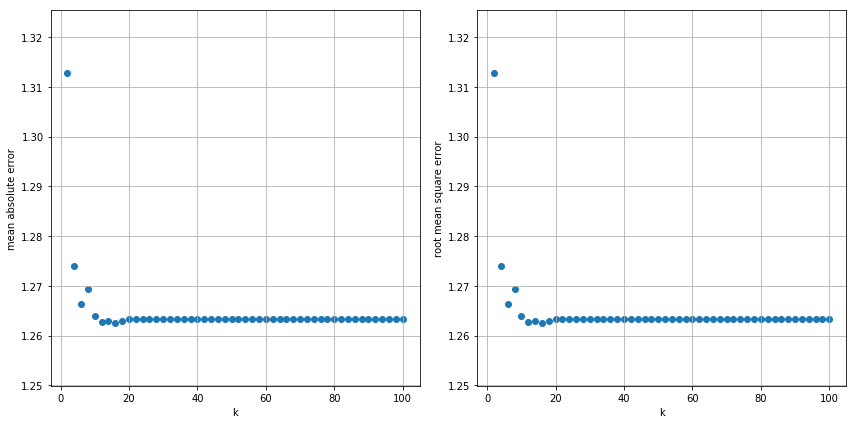

In [21]:
plot_mae_n_rmse(highvar_mae_errors, highvar_mae_errors, ks, None, 'q14.png')

## Q15

In [22]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings, reader)
sim_options = {'name': 'pearson'}
algo = KNNBaseline(k=18, sim_options=sim_options)

trn, tst = train_test_split(data, test_size=0.1)
algo.fit(trn)
prediction = algo.test(tst, verbose=False)
y_true_pred = np.array([pred[2:4] for pred in prediction])

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


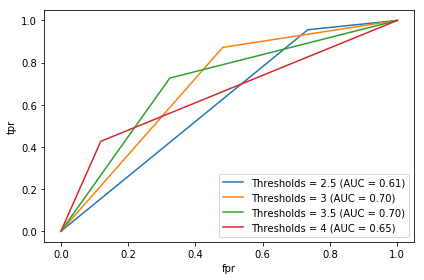

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
thresholds = [2.5, 3, 3.5, 4]

for threshold in thresholds:
    results = np.where(y_true_pred>=threshold, 1, 0)
    fpr, tpr, thresholds = roc_curve(results[:, 0], results[:, 1])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='Thresholds = %s (AUC = %0.2f)' % (threshold, roc_auc))
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.legend()
    
fig.tight_layout()
fig.savefig('report/figures/q15.png', dpi=300)

In [ ]:
# save for q34

In [ ]:
results = np.where(y_true_pred>3, 1, 0)
pickle.dump(results, open('results/' + 'q34-knn', 'wb'))

# Section 5.2

In [ ]:
from surprise import NMF

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings, reader)
#sim_options = {'name': 'pearson'}

mae_errors = []
rmse_errors = []
ks = np.arange(2, 50, 2)

for k in ks:
    if k % 10 == 0:
        print(k)
    alg = NMF(n_factors=k)
    results = cross_validate(alg, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    mae_errors.append(results['test_mae'].mean())
    rmse_errors.append(results['test_rmse'].mean())

10


## Q17-18

In [ ]:
plot_mae_n_rmse(mae_errors, rmse_error, ks, None, 'q17.png')

In [ ]:
x = np.array(mae_errors)
y = np.array(rmse_errors)
sum_xy = x + y

print(x)
print(y)
print(sum_xy)
print(ks[x.argmin()])
print(ks[y.argmin()])
print(ks[sum_xy.argmin()])

In [54]:
sim_options = {'name': 'pearson'}
reader = Reader(rating_scale=(1, 5))
popular_mae_errors = []
unpplar_mae_errors = []
highvar_mae_errors = []
popular_rmse_errors = []
unpplar_rmse_errors = []
highvar_rmse_errors = []

ks = np.arange(2, 50, 2)

for k in ks:
    print(k)
    popular_mae_folds = []
    unpplar_mae_folds = []
    highvar_mae_folds = []
    popular_rmse_fold = []
    unpplar_rmse_fold = []
    highvar_rmse_fold = []
    
    algo = NMF(n_factors=k)
    kfold = KFold(n_splits=10, shuffle=True, random_state=177)
    for trn_idx, tst_idx in kfold.split(ratings):
        trn = ratings.iloc[trn_idx, :]
        tst = ratings.iloc[tst_idx, :]
        popular_tst = tst[tst.movieId.isin(popular_movies)]
        unpplar_tst = tst[tst.movieId.isin(unpplar_movies)]
        highvar_tst = tst[tst.movieId.isin(highvar_movies)]
        
        trn_suprise = Dataset.load_from_df(trn[['userId', 'movieId', 'rating']], reader).build_full_trainset()
        popular_tst = Dataset.load_from_df(popular_tst[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()
        unpplar_tst = Dataset.load_from_df(unpplar_tst[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()
        highvar_tst = Dataset.load_from_df(highvar_tst[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()
        
        algo.fit(trn_suprise)
        popular_results = algo.test(popular_tst, verbose=False)
        unpplar_results = algo.test(unpplar_tst, verbose=False)
        highvar_results = algo.test(highvar_tst, verbose=False)
        
        popular_mae_folds.append(accuracy.mae(popular_results, verbose=False))
        unpplar_mae_folds.append(accuracy.mae(unpplar_results, verbose=False))
        highvar_mae_folds.append(accuracy.mae(highvar_results, verbose=False))
        
        popular_rmse_fold.append(accuracy.rmse(popular_results, verbose=False))
        unpplar_rmse_fold.append(accuracy.rmse(unpplar_results, verbose=False))
        highvar_rmse_fold.append(accuracy.rmse(highvar_results, verbose=False))
    
    popular_mae_errors.append(np.mean(popular_mae_folds))
    unpplar_mae_errors.append(np.mean(unpplar_mae_folds))
    highvar_mae_errors.append(np.mean(highvar_mae_folds))
    popular_rmse_errors.append(np.mean(popular_rmse_fold))
    unpplar_rmse_errors.append(np.mean(unpplar_rmse_fold))
    highvar_rmse_errors.append(np.mean(highvar_rmse_fold))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48


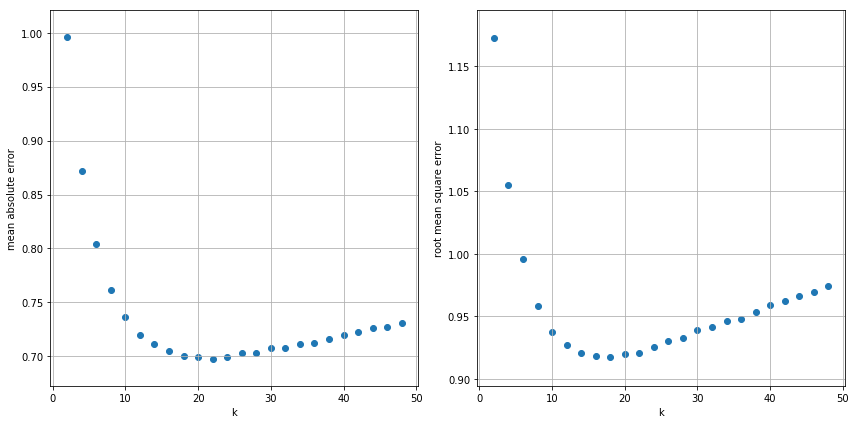

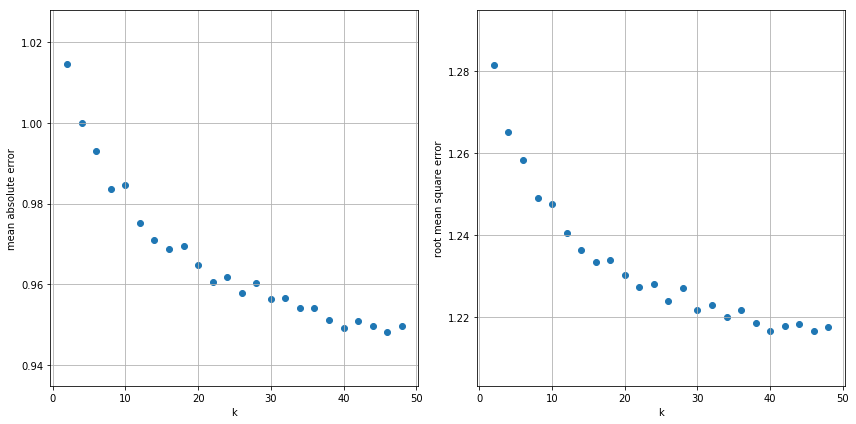

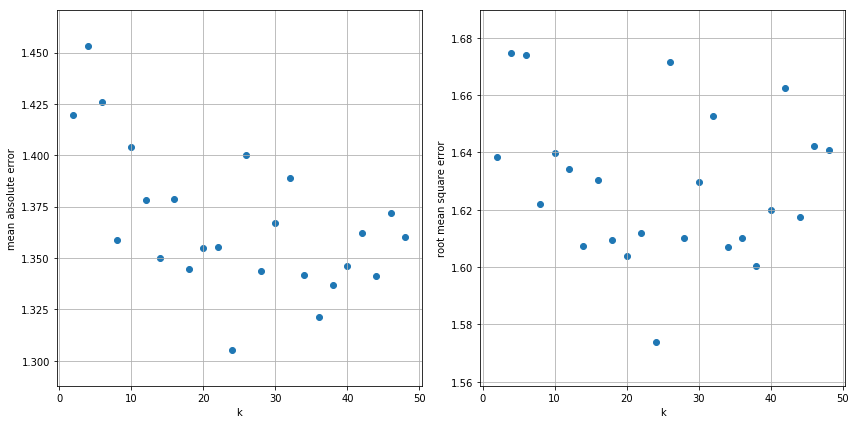

In [58]:
plot_mae_n_rmse(popular_mae_errors, popular_rmse_errors, ks, None, 'q19.png')
plot_mae_n_rmse(unpplar_mae_errors, unpplar_rmse_errors, ks, None, 'q20.png')
plot_mae_n_rmse(highvar_mae_errors, highvar_rmse_errors, ks, None, 'q21.png')

## Question 19-21

In [82]:
print("popular min mae = {0}".format(np.min(popular_mae_errors)))
print("popular min rmse = {0}".format(np.min(popular_rmse_errors)))
print("unpopular min mae = {0}".format(np.min(unpplar_mae_errors)))
print("unpopular min rmse = {0}".format(np.min(unpplar_rmse_errors)))
print("high variance min mae = {0}".format(np.min(highvar_mae_errors)))
print("high variance min rmse = {0}".format(np.min(highvar_rmse_errors)))

popular min mae = 0.6976925078863775
popular min rmse = 0.9173025736786065
unpopular min mae = 0.9482405968119358
unpopular min rmse = 1.2166829822158745
high variance min mae = 1.3053119714519839
high variance min rmse = 1.5737364229530446


In [77]:
min_k = np.max([np.argmax(popular_mae_errors - np.min(popular_mae_errors) <= 5e-3), np.argmax(popular_rmse_errors - np.min(popular_rmse_errors) <= 5e-3)])
print("popular = {0}".format(ks[min_k]))
min_k = np.max([np.argmax(unpplar_mae_errors - np.min(unpplar_mae_errors) <= 5e-3), np.argmax(unpplar_rmse_errors - np.min(unpplar_rmse_errors) <= 5e-3)])
print("unpopular = {0}".format(ks[min_k]))
min_k = np.max([np.argmax(highvar_mae_errors - np.min(highvar_mae_errors) <= 5e-3), np.argmax(highvar_rmse_errors - np.min(highvar_rmse_errors) <= 5e-3)])
print("high variance = {0}".format(ks[min_k]))

popular = 18
unpopular = 38
high variance = 24


# Section 5.3

## Q24 - Q 29

# Section 6

## Q30 - Q33

# Section 7

## Q34

# Section 8

## Q35

## Q36

In [ ]:
n_splits = 10
threshold = 3
ts = np.arange(1, 26, 1).tolist()
scoring = np.zeros([n_splits, len(ts)*2])
args = ts + [threshold]

reader = Reader(rating_scale=(1, 5))
sim_options = {'name': 'pearson'}
algo = KNNBaseline(k=18, sim_options=sim_options)
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=177)

for i, (trn_idx, tst_idx) in enumerate(kfold.split(ratings)):
    trn = ratings.iloc[trn_idx, :]
    tst = ratings.iloc[tst_idx, :]
    
    trn_surprise = Dataset.load_from_df(trn[['userId', 'movieId', 'rating']], reader).build_full_trainset()
    tst_surprise = Dataset.load_from_df(tst[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()

    algo.fit(trn_surprise)
    prediction = algo.test(tst_surprise, verbose=False)
    
    grouped_tst = build_tst(tst, prediction)
    results = grouped_tst.apply(compute_ppv_tpr, *args)
    
    scoring_folds = []
    for j in range(50):
        scoring_folds.append(results.apply(lambda x: x[j]).mean(skipna=True))
    scoring[i, :] = scoring_folds
scoring = scoring.mean(axis=0).reshape(2, len(ts))

In [ ]:
pickle.dump(results, open('results/' + 'q36-knn', 'wb'))

## Q37

## Q38

## Q39